# <font color='crimson'> Choix des paramètres pour SMC++ </font>

Paramètres testés :

SPLINE : cubic ou piecewise

RP : 1, 3 ou 6

KNOTS : 10 ou 21

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad 
import os
from scipy.interpolate import make_interp_spline
from scipy.optimize import curve_fit

In [2]:
def moy(L) : #fait la moyenne : L = [[1, 2], [3, 4]] -> M = [2, 3]
    M = []
    for i in range(0, len(L[0])) :
        m = 0
        for j in range(0, len(L)):
            m += L[j][i]
        m = m/len(L)
        M.append(m)
    return M
    
def fonction_moyenne(dir, t):
    os.chdir(dir)
    file = os.listdir()
    M = []
    nb_rep = 0
    for f in file :
        if ".csv" in f: #pour chaque csv du répertoire
            nb_rep += 1
            df = pd.read_csv(f, sep=",")
            X = df['x']
            X = [x for x in X if np.isnan(x) == False]
            Y = df['y']
            f = make_interp_spline(X, Y, k=1)
            y = f(t)
            M.append(y) 
    return moy(M), nb_rep

    
def f_att_tepoch(time, Ni, T, nu) :
    res = []
    for t in time:
        if t >= T :
            res.append(Ni)
        else :
            res.append(Ni*nu)
    return res 

def f_att_expo(time, Ne, T, nu) :
    res = []
    #beta = np.log(nu)/T
    for t in time:
        if t >= T :
            res.append(Ne)
        else :
            res.append(Ne * np.exp(np.log(nu)/T*(T-t)))
    return res 

def f_att_const(time, Ne, T, nu) :
    return Ne+0*time 

def erreur_fonction_moyenne(dir, t, Ne, T, nu, f_att, nb_gen):
    Y_moy, nb_rep = fonction_moyenne(dir, t)

    def difference(t, Ne, T, nu):
        Y = []
        for i in range(len(Y_moy)):
            Y.append((f_att(t, Ne, T, nu)[i]-Y_moy[i])**2/f_att(t, Ne, T, nu)[i]**2)
        return Y

    Y = difference(t, Ne, T, nu)
    dif = make_interp_spline(t, Y, k=1)
    
    d = quad(dif, t[0], t[-1])[0]/nb_gen
    return d, nb_rep

In [3]:
#Constant
c_cu_k10_rp1 = "/home/goulet/Stage/Test_param_SMC/neutral_model/EGR/EGR_10/plot/cubic/rp1"
c_cu_k10_rp3 = "/home/goulet/Stage/Test_param_SMC/neutral_model/EGR/EGR_10/plot/cubic/rp3"
c_cu_k10_rp6 = "/home/goulet/Stage/Test_param_SMC/neutral_model/EGR/EGR_10/plot/cubic/rp6"

c_cu_k21_rp1 = "/home/goulet/Stage/Test_param_SMC/neutral_model/EGR/EGR_21/plot/cubic/rp1"
c_cu_k21_rp3 = "/home/goulet/Stage/Test_param_SMC/neutral_model/EGR/EGR_21/plot/cubic/rp3"
c_cu_k21_rp6 = "/home/goulet/Stage/Test_param_SMC/neutral_model/EGR/EGR_21/plot/cubic/rp6"

c_pw_k10_rp1 = "/home/goulet/Stage/Test_param_SMC/neutral_model/EGR/EGR_10/plot/piecewise/rp1"
c_pw_k10_rp3 = "/home/goulet/Stage/Test_param_SMC/neutral_model/EGR/EGR_10/plot/piecewise/rp3"
c_pw_k10_rp6 = "/home/goulet/Stage/Test_param_SMC/neutral_model/EGR/EGR_10/plot/piecewise/rp6"

c_pw_k21_rp1 = "/home/goulet/Stage/Test_param_SMC/neutral_model/EGR/EGR_21/plot/piecewise/rp1"
c_pw_k21_rp3 = "/home/goulet/Stage/Test_param_SMC/neutral_model/EGR/EGR_21/plot/piecewise/rp3"
c_pw_k21_rp6 = "/home/goulet/Stage/Test_param_SMC/neutral_model/EGR/EGR_21/plot/piecewise/rp6"

#Exponentiel
e_cu_k10_rp1 = "/home/goulet/Stage/Test_param_SMC/exponential_model/EGR/EGR_10/plot/cubic/rp1"
e_cu_k10_rp3 = "/home/goulet/Stage/Test_param_SMC/exponential_model/EGR/EGR_10/plot/cubic/rp3"
e_cu_k10_rp6 = "/home/goulet/Stage/Test_param_SMC/exponential_model/EGR/EGR_10/plot/cubic/rp6"

e_cu_k21_rp1 = "/home/goulet/Stage/Test_param_SMC/exponential_model/EGR/EGR_21/plot/cubic/rp1"
e_cu_k21_rp3 = "/home/goulet/Stage/Test_param_SMC/exponential_model/EGR/EGR_21/plot/cubic/rp3"
e_cu_k21_rp6 = "/home/goulet/Stage/Test_param_SMC/exponential_model/EGR/EGR_21/plot/cubic/rp6"

e_pw_k10_rp1 = "/home/goulet/Stage/Test_param_SMC/exponential_model/EGR/EGR_10/plot/piecewise/rp1"
e_pw_k10_rp3 = "/home/goulet/Stage/Test_param_SMC/exponential_model/EGR/EGR_10/plot/piecewise/rp3"
e_pw_k10_rp6 = "/home/goulet/Stage/Test_param_SMC/exponential_model/EGR/EGR_10/plot/piecewise/rp6"

e_pw_k21_rp1 = "/home/goulet/Stage/Test_param_SMC/exponential_model/EGR/EGR_21/plot/piecewise/rp1"
e_pw_k21_rp3 = "/home/goulet/Stage/Test_param_SMC/exponential_model/EGR/EGR_21/plot/piecewise/rp3"
e_pw_k21_rp6 = "/home/goulet/Stage/Test_param_SMC/exponential_model/EGR/EGR_21/plot/piecewise/rp6"

#2époques
te_cu_k10_rp1 = "/home/goulet/Stage/Test_param_SMC/twoepoch_model/EGR/EGR_10/plot/cubic/rp1"
te_cu_k10_rp3 = "/home/goulet/Stage/Test_param_SMC/twoepoch_model/EGR/EGR_10/plot/cubic/rp3"
te_cu_k10_rp6 = "/home/goulet/Stage/Test_param_SMC/twoepoch_model/EGR/EGR_10/plot/cubic/rp6"

te_cu_k21_rp1 = "/home/goulet/Stage/Test_param_SMC/twoepoch_model/EGR/EGR_21/plot/cubic/rp1"
te_cu_k21_rp3 = "/home/goulet/Stage/Test_param_SMC/twoepoch_model/EGR/EGR_21/plot/cubic/rp3"
te_cu_k21_rp6 = "/home/goulet/Stage/Test_param_SMC/twoepoch_model/EGR/EGR_21/plot/cubic/rp6"

te_pw_k10_rp1 = "/home/goulet/Stage/Test_param_SMC/twoepoch_model/EGR/EGR_10/plot/piecewise/rp1"
te_pw_k10_rp3 = "/home/goulet/Stage/Test_param_SMC/twoepoch_model/EGR/EGR_10/plot/piecewise/rp3"
te_pw_k10_rp6 = "/home/goulet/Stage/Test_param_SMC/twoepoch_model/EGR/EGR_10/plot/piecewise/rp6"

te_pw_k21_rp1 = "/home/goulet/Stage/Test_param_SMC/twoepoch_model/EGR/EGR_21/plot/piecewise/rp1"
te_pw_k21_rp3 = "/home/goulet/Stage/Test_param_SMC/twoepoch_model/EGR/EGR_21/plot/piecewise/rp3"
te_pw_k21_rp6 = "/home/goulet/Stage/Test_param_SMC/twoepoch_model/EGR/EGR_21/plot/piecewise/rp6"

In [5]:
t1 = np.linspace(0, 10000)
t2 = np.linspace(0, 20000)

Ec10_cu_rp1 = erreur_fonction_moyenne(c_cu_k10_rp1, t1, 1000, 3000, 1, f_att_const, 10000)
Ec10_cu_rp3 = erreur_fonction_moyenne(c_cu_k10_rp3, t1, 1000, 3000, 1, f_att_const, 10000)
Ec10_cu_rp6 = erreur_fonction_moyenne(c_cu_k10_rp6, t1, 1000, 3000, 1, f_att_const, 10000)

Ec21_cu_rp1 = erreur_fonction_moyenne(c_cu_k21_rp1, t1, 1000, 3000, 1, f_att_const, 10000)
Ec21_cu_rp3 = erreur_fonction_moyenne(c_cu_k21_rp3, t1, 1000, 3000, 1, f_att_const, 10000)
Ec21_cu_rp6 = erreur_fonction_moyenne(c_cu_k21_rp6, t1, 1000, 3000, 1, f_att_const, 10000)

Ec10_pw_rp1 = erreur_fonction_moyenne(c_pw_k10_rp1, t1, 1000, 3000, 1, f_att_const, 10000)
Ec10_pw_rp3 = erreur_fonction_moyenne(c_pw_k10_rp3, t1, 1000, 3000, 1, f_att_const, 10000)
Ec10_pw_rp6 = erreur_fonction_moyenne(c_pw_k10_rp6, t1, 1000, 3000, 1, f_att_const, 10000)

Ec21_pw_rp1 = erreur_fonction_moyenne(c_pw_k21_rp1, t1, 1000, 3000, 1, f_att_const, 10000)
Ec21_pw_rp3 = erreur_fonction_moyenne(c_pw_k21_rp3, t1, 1000, 3000, 1, f_att_const, 10000)
Ec21_pw_rp6 = erreur_fonction_moyenne(c_pw_k21_rp6, t1, 1000, 3000, 1, f_att_const, 10000)

######

Ee10_cu_rp1 = erreur_fonction_moyenne(e_cu_k10_rp1, t1, 1000, 3000, 15.7, f_att_expo, 10000)
Ee10_cu_rp3 = erreur_fonction_moyenne(e_cu_k10_rp3, t1, 1000, 3000, 15.7, f_att_expo, 10000)
Ee10_cu_rp6 = erreur_fonction_moyenne(e_cu_k10_rp6, t1, 1000, 3000, 15.7, f_att_const, 10000)

Ee21_cu_rp1 = erreur_fonction_moyenne(e_cu_k21_rp1, t1, 1000, 3000, 15.7, f_att_expo, 10000)
Ee21_cu_rp3 = erreur_fonction_moyenne(e_cu_k21_rp3, t1, 1000, 3000, 15.7, f_att_expo, 10000)
Ee21_cu_rp6 = erreur_fonction_moyenne(e_cu_k21_rp6, t1, 1000, 3000, 15.7, f_att_expo, 10000)

Ee10_pw_rp1 = erreur_fonction_moyenne(e_pw_k10_rp1, t1, 1000, 3000, 15.7, f_att_expo, 10000)
Ee10_pw_rp3 = erreur_fonction_moyenne(e_pw_k10_rp3, t1, 1000, 3000, 15.7, f_att_expo, 10000)
Ee10_pw_rp6 = erreur_fonction_moyenne(e_pw_k10_rp6, t1, 1000, 3000, 15.7, f_att_expo, 10000)

Ee21_pw_rp1 = erreur_fonction_moyenne(e_pw_k21_rp1, t1, 1000, 3000, 15.7, f_att_expo, 10000)
Ee21_pw_rp3 = erreur_fonction_moyenne(e_pw_k21_rp3, t1, 1000, 3000, 15.7, f_att_expo, 10000)
Ee21_pw_rp6 = erreur_fonction_moyenne(e_pw_k21_rp6, t1, 1000, 3000, 15.7, f_att_expo, 10000)

#####

Ete10_cu_rp1 = erreur_fonction_moyenne(te_cu_k10_rp1, t2, 2000, 200, 0.1, f_att_tepoch, 20000)
Ete10_cu_rp3 = erreur_fonction_moyenne(te_cu_k10_rp3, t2, 2000, 200, 0.1, f_att_tepoch, 20000)
Ete10_cu_rp6 = erreur_fonction_moyenne(te_cu_k10_rp6, t2, 2000, 200, 0.1, f_att_tepoch, 20000)

Ete21_cu_rp1 = erreur_fonction_moyenne(te_cu_k21_rp1, t2, 2000, 200, 0.1, f_att_tepoch, 20000)
Ete21_cu_rp3 = erreur_fonction_moyenne(te_cu_k21_rp3, t2, 2000, 200, 0.1, f_att_tepoch, 20000)
Ete21_cu_rp6 = erreur_fonction_moyenne(te_cu_k21_rp6, t2, 2000, 200, 0.1, f_att_tepoch, 20000)

Ete10_pw_rp1 = erreur_fonction_moyenne(te_pw_k10_rp1, t2, 2000, 200, 0.1, f_att_tepoch, 20000)
Ete10_pw_rp3 = erreur_fonction_moyenne(te_pw_k10_rp3, t2, 2000, 200, 0.1, f_att_tepoch, 20000)
Ete10_pw_rp6 = erreur_fonction_moyenne(te_pw_k10_rp6, t2, 2000, 200, 0.1, f_att_tepoch, 20000)

Ete21_pw_rp1 = erreur_fonction_moyenne(te_pw_k21_rp1, t2, 2000, 200, 0.1, f_att_tepoch, 20000)
Ete21_pw_rp3 = erreur_fonction_moyenne(te_pw_k21_rp3, t2, 2000, 200, 0.1, f_att_tepoch, 20000)
Ete21_pw_rp6 = erreur_fonction_moyenne(te_pw_k21_rp6, t2, 2000, 200, 0.1, f_att_tepoch, 20000)

/tmp/ipykernel_4398/2210433270.py:63: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  d = quad(dif, t[0], t[-1])[0]/nb_gen


Text(0, 0.5, 'ISRE')

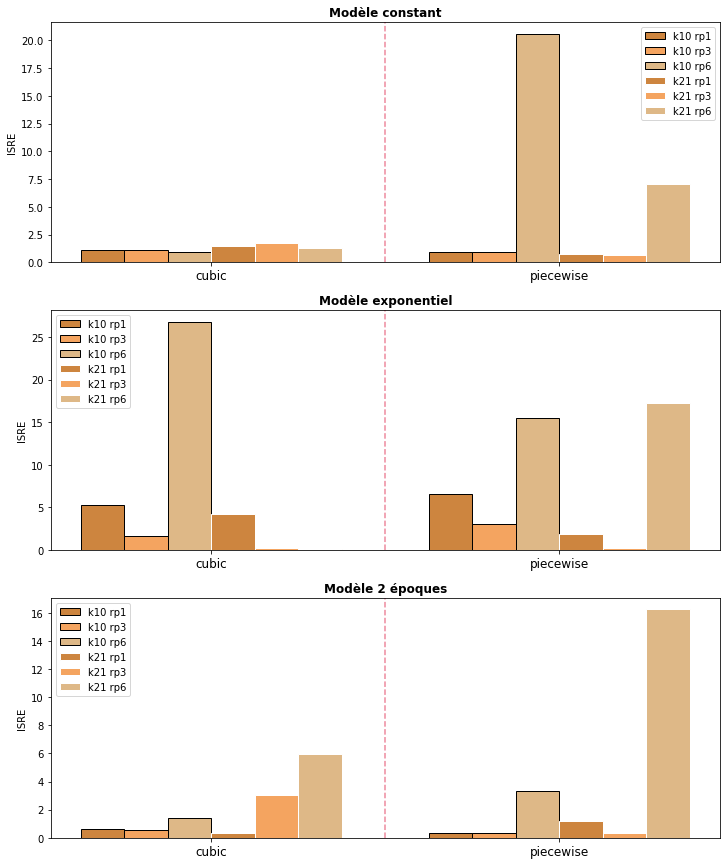

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(12,15))

# set width of bars
barWidth = 0.5

# Set position of bar on X axis
r1 = np.arange(1)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + 3*barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
r11 = [x + barWidth for x in r10]
r12 = [x + barWidth for x in r11]

# Modèle constant
ax[0].bar(r1, Ec10_cu_rp1[0], color='peru', width=barWidth, edgecolor='black', label='k10 rp1')
#ax[0].text(-0.1, Ec10_cu_rp1[0]+0.0001, format(E_c_cu[0][0], '.1E'))
ax[0].bar(r2, Ec10_cu_rp3[0], color='sandybrown', width=barWidth, edgecolor='black', label='k10 rp3')
#ax[0].text(0.3, Ec10_cu_rp3[0]+0.0002, format(E_c_cu[1][0], '.1E'))
ax[0].bar(r3, Ec10_cu_rp6[0], color='burlywood', width=barWidth, edgecolor='black', label='k10 rp6')
#ax[0].text(0.9, Ec10_cu_rp6[0]+0.0001, str(Ec10_cu_rp6[1]))
ax[0].bar(r4, Ec21_cu_rp1[0], color='peru', width=barWidth, edgecolor='white', label='k21 rp1')
#ax[0].text(1.4, Ec21_cu_rp1[0]+0.0001, str(Ec21_cu_rp1[1]))
ax[0].bar(r5, Ec21_cu_rp3[0], color='sandybrown', width=barWidth, edgecolor='white', label='k21 rp3')
#ax[0].text(1.9, Ec10_cu_rp6[0]+0.0001, str(Ec21_cu_rp3[1]))
ax[0].bar(r6, Ec21_cu_rp6[0], color='burlywood', width=barWidth, edgecolor='white', label='k21 rp6')
#ax[0].text(2.4, Ec21_cu_rp6[0]+0.0001, str(Ec21_cu_rp6[1]))

ax[0].bar(r7, Ec10_pw_rp1[0], color='peru', width=barWidth, edgecolor='black')
#ax[0].text(3.8, Ec10_pw_rp1[0]+0.0002, format(E_c_pw[0][0], '.1E'))
ax[0].bar(r8, Ec10_pw_rp3[0], color='sandybrown', width=barWidth, edgecolor='black')
#ax[0].text(4.4, Ec10_pw_rp3[0]+0.0001, str(Ec10_pw_rp3[1]))
ax[0].bar(r9, Ec10_pw_rp6[0], color='burlywood', width=barWidth, edgecolor='black')
#ax[0].text(4.9, Ec21_pw_rp3[0]+0.0001, str(Ec10_pw_rp6[1]))
ax[0].bar(r10, Ec21_pw_rp1[0], color='peru', width=barWidth, edgecolor='white')
#ax[0].text(5.4, Ec21_pw_rp1[0]+0.0001, str(Ec21_pw_rp1[1]))
ax[0].bar(r11, Ec21_pw_rp3[0], color='sandybrown', width=barWidth, edgecolor='white')
#ax[0].text(5.9, Ec21_pw_rp3[0]+0.0001, str(Ec21_pw_rp3[1]))
ax[0].bar(r12, Ec21_pw_rp6[0], color='burlywood', width=barWidth, edgecolor='white')
#ax[0].text(6.4, Ec21_pw_rp3[0]+0.0001, str(Ec21_pw_rp6[1]))

ax[0].set_xticks([1.25, 5.25]) 
ax[0].axvline(3.25, c='crimson', ls='--',alpha=0.5)
ax[0].set_xticklabels(['cubic', 'piecewise'], fontsize=12)
 
ax[0].set_title('Modèle constant', fontweight='bold')
ax[0].legend()
ax[0].set_ylabel("ISRE")
#ax[0].set_ylim(0, 0.02)

# Modèle exponentiel
ax[1].bar(r1, Ee10_cu_rp1[0], color='peru', width=barWidth, edgecolor='black', label='k10 rp1')
#ax[1].text(-0.1, Ee10_cu_rp1[0]+0.1, str(Ee10_cu_rp1[1]))
ax[1].bar(r2, Ee10_cu_rp3[0], color='sandybrown', width=barWidth, edgecolor='black', label='k10 rp3')
#ax[1].text(0.4, Ee10_cu_rp3[0]+0.1, str(Ee10_cu_rp3[1]))
ax[1].bar(r3, Ee10_cu_rp6[0], color='burlywood', width=barWidth, edgecolor='black', label='k10 rp6')
#ax[1].text(0.9, Ee10_cu_rp6[0]+0.1, str(Ee10_cu_rp6[1]))
ax[1].bar(r4, Ee21_cu_rp1[0], color='peru', width=barWidth, edgecolor='white', label='k21 rp1')
#ax[1].text(1.4, Ee21_cu_rp1[0]+0.1, str(Ee21_cu_rp1[1]))
ax[1].bar(r5, Ee21_cu_rp3[0], color='sandybrown', width=barWidth, edgecolor='white', label='k21 rp3')
#ax[1].text(1.9, Ee21_cu_rp3[0]+0.1, str(Ee21_cu_rp3[1]))
ax[1].bar(r6, Ee21_cu_rp6[0], color='burlywood', width=barWidth, edgecolor='white', label='k21 rp6')
#ax[1].text(2.3, Ee21_cu_rp6[0]+0.1, format(E_e_cu[5][0], '.1E'))

ax[1].bar(r7, Ee10_pw_rp1[0], color='peru', width=barWidth, edgecolor='black')
#ax[1].text(3.8, Ec10_pw_rp1[0]+0.1, format(E_e_pw[0][0], '.1E'))
ax[1].bar(r8, Ee10_pw_rp3[0], color='sandybrown', width=barWidth, edgecolor='black')
#ax[1].text(4.4, Ee10_pw_rp3[0]+0.1, str(Ee10_pw_rp3[1]))
ax[1].bar(r9, Ee10_pw_rp6[0], color='burlywood', width=barWidth, edgecolor='black')
#ax[1].text(4.9, Ee10_pw_rp1[0]+0.1, str(Ee10_pw_rp6[1]))
ax[1].bar(r10, Ee21_pw_rp1[0], color='peru', width=barWidth, edgecolor='white')
#ax[1].text(5.4, Ee21_pw_rp1[0]+0.1, str(Ee21_pw_rp1[1]))
ax[1].bar(r11, Ee21_pw_rp3[0], color='sandybrown', width=barWidth, edgecolor='white')
#ax[1].text(5.8, Ee21_pw_rp3[0]+0.1, format(E_e_pw[4][0], '.1E'))
ax[1].bar(r12, Ee21_pw_rp6[0], color='burlywood', width=barWidth, edgecolor='white')
#ax[1].text(6.4, Ee10_pw_rp1[0]+0.1, str(Ee21_pw_rp6[1]))

ax[1].set_xticks([1.25, 5.25]) 
ax[1].axvline(3.25, c='crimson', ls='--',alpha=0.5)
ax[1].set_xticklabels(['cubic', 'piecewise'], fontsize=12)
 
ax[1].set_title('Modèle exponentiel', fontweight='bold')
ax[1].legend()
ax[1].set_ylabel("ISRE")
#ax[1].set_ylim(0, 10)

# Modèle 2 époques
ax[2].bar(r1, Ete10_cu_rp1[0], color='peru', width=barWidth, edgecolor='black', label='k10 rp1')
#ax[2].text(-0.1, Ete10_cu_rp1[0]+0.1, str(Ete10_cu_rp1[1]))
ax[2].bar(r2, Ete10_cu_rp3[0], color='sandybrown', width=barWidth, edgecolor='black', label='k10 rp3')
#ax[2].text(0.4, Ete10_cu_rp3[0]+0.1, str(Ete10_cu_rp3[1]))
ax[2].bar(r3, Ete10_cu_rp6[0], color='burlywood', width=barWidth, edgecolor='black', label='k10 rp6')
#ax[2].text(0.9, Ete10_cu_rp6[0]+0.1, str(Ete10_cu_rp6[1]))
ax[2].bar(r4, Ete21_cu_rp1[0], color='peru', width=barWidth, edgecolor='white', label='k21 rp1')
#ax[2].text(1.3, Ete21_cu_rp1[0]+0.1, format(E_te_cu[3][0], '.1E'))
ax[2].bar(r5, Ete21_cu_rp3[0], color='sandybrown', width=barWidth, edgecolor='white', label='k21 rp3')
#ax[2].text(1.9, Ete21_cu_rp3[0]+0.1, str(Ete21_cu_rp3[1]))
ax[2].bar(r6, Ete21_cu_rp6[0], color='burlywood', width=barWidth, edgecolor='white', label='k21 rp6')
#ax[2].text(2.4, Ete21_cu_rp6[0]+0.1, str(Ete21_cu_rp6[1]))

ax[2].bar(r7, Ete10_pw_rp1[0], color='peru', width=barWidth, edgecolor='black')
#ax[2].text(3.75, Ete10_pw_rp1[0]+0.1, format(E_te_pw[0][0], '.1E'))
ax[2].bar(r8, Ete10_pw_rp3[0], color='sandybrown', width=barWidth, edgecolor='black')
#ax[2].text(4.4, Ete10_pw_rp3[0]+0.1, str(Ete10_pw_rp3[1]))
ax[2].bar(r9, Ete10_pw_rp6[0], color='burlywood', width=barWidth, edgecolor='black')
#ax[2].text(4.9, Ete10_pw_rp6[0]+0.1, str(Ete10_pw_rp6[1]))
ax[2].bar(r10, Ete21_pw_rp1[0], color='peru', width=barWidth, edgecolor='white')
#ax[2].text(5.4, Ete21_pw_rp1[0]+0.1, str(Ete21_pw_rp1[1]))
ax[2].bar(r11, Ete21_pw_rp3[0], color='sandybrown', width=barWidth, edgecolor='white')
#ax[2].text(5.8, Ete21_pw_rp3[0]+0.1, format(E_te_pw[4][0], '.1E'))
ax[2].bar(r12, Ete21_pw_rp6[0], color='burlywood', width=barWidth, edgecolor='white')
#ax[2].text(6.4, Ete21_pw_rp3[0]+0.1, str(Ete21_pw_rp6[1]))

ax[2].set_xticks([1.25, 5.25]) 
ax[2].axvline(3.25, c='crimson', ls='--',alpha=0.5)
ax[2].set_xticklabels(['cubic', 'piecewise'], fontsize=12)
 
ax[2].set_title('Modèle 2 époques', fontweight='bold')
ax[2].legend()
ax[2].set_ylabel("ISRE")
#ax[2].set_ylim(0, 10)


#fig.savefig("/home/goulet/Documents/Stage/choix_param_SMC.png")

In [3]:
def fit_all_replicats(dir, f_att, init_vals):
    os.chdir(dir)
    file = os.listdir() 
    Ne = []
    T = []
    Nu = []
    for f in file :
        if ".csv" in f:
            df = pd.read_csv(f, sep=",")
            X = [x for x in df['x'][1:] if np.isnan(x) == False]
            Y = [x for x in df['y'][1:] if np.isnan(x) == False]
            best_vals, covar = curve_fit(f_att, X, Y, p0=init_vals)
            Ne.append(best_vals[0])
            if len(best_vals) > 1: #on est dans le modèle exponentiel ou 2époques
                T.append(best_vals[1]/(2*best_vals[0]))
                Nu.append(best_vals[2])
    return Ne, T, Nu

In [4]:
def sigmoide(t, a, b, c):
    return c/(1+a*np.exp(-b*t))

def der_sigmoide(t, a, b, c):
    return a*b*c*np.exp(-b*t)/(1+a*np.exp(-b*t))**2

def fit_all_replicats_sigmo(dir, init_vals):
    os.chdir(dir)
    file = os.listdir() 
    T = []
    Ni = []
    Nf = []
    for f in file :
        if ".csv" in f:
            df = pd.read_csv(f, sep=",")
            best_vals, covar = curve_fit(sigmoide, df['x'][1:], df['y'][1:], p0=init_vals) #on fitte avec la sigmoide
            Y = der_sigmoide(t, best_vals[0], best_vals[1], best_vals[2]) #on la dérive
            for time in t :
                y = der_sigmoide(time, best_vals[0], best_vals[1], best_vals[2])
                if y == max(Y): #on récupère le point pour lequel le dérivée est max
                    T.append(time/(2*sigmoide(20000, best_vals[0], best_vals[1], best_vals[2])))

            Ni.append(sigmoide(20000, best_vals[0], best_vals[1], best_vals[2]))
            Nf.append(sigmoide(0, best_vals[0], best_vals[1], best_vals[2]))
    return T, Ni, Nf

#### _______________

# <font color='crimson'> Erreurs avec les paramètres sélectionnés </font>

In [6]:
#Modèle constant
cEGR = '/home/goulet/Stage/Simulations_recapitate/neutral_model_2/EGR/plot'
c10GR = '/home/goulet/Stage/Simulations_recapitate/neutral_model_2/10GR/plot'
c100GR = '/home/goulet/Stage/Simulations_recapitate/neutral_model_2/100GR/plot'
c1000GR = '/home/goulet/Stage/Simulations_recapitate/neutral_model_2/1000GR/plot'

Ne = 2000
nu = 1
T = 0
t = np.linspace(0, 10000)


e_EGR, nb_EGR = erreur_fonction_moyenne(cEGR, t, Ne, T, nu, f_att_const, 10000)
e_10GR, nb_10GR = erreur_fonction_moyenne(c10GR, t, Ne, T, nu, f_att_const, 10000)
e_100GR, nb_100GR = erreur_fonction_moyenne(c100GR, t, Ne, T, nu, f_att_const, 10000)
e_1000GR, nb_1000GR = erreur_fonction_moyenne(c1000GR, t, Ne, T, nu, f_att_const, 10000)

init_vals_const = [2000, 0, 1] #Valeur initiale de Ne (on prend la valeur théorique)

Ne_cEGR, T_cEGR, Nu_cEGR = fit_all_replicats(cEGR, f_att_const, init_vals_const)
Ne_c10GR, T_c10GR, Nu_c10GR = fit_all_replicats(c10GR, f_att_const, init_vals_const)
Ne_c100GR, T_c100GR, Nu_c100GR = fit_all_replicats(c100GR, f_att_const, init_vals_const)
Ne_c1000GR, T_c1000GR, Nu_c1000GR = fit_all_replicats(c1000GR, f_att_const, init_vals_const)

Ne_constant = [Ne_cEGR, Ne_c10GR, Ne_c100GR, Ne_c1000GR]

/tmp/ipykernel_6052/2210433270.py:63: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  d = quad(dif, t[0], t[-1])[0]/nb_gen
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


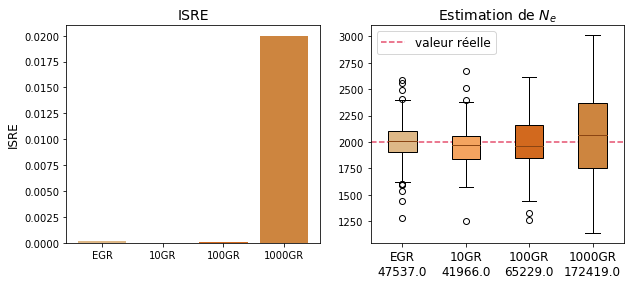

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
BoxName = ['EGR','10GR', '100GR','1000GR']
BoxName2 = ['EGR\n'+str(round(np.var(Ne_cEGR))),'10GR\n'+str(round(np.var(Ne_c10GR))), '100GR\n'+str(round(np.var(Ne_c100GR))),'1000GR\n'+str(round(np.var(Ne_c1000GR)))]

# Histogramme des IRSE
r = np.arange(4)
ax[0].bar(r, [e_EGR, e_10GR, e_100GR, e_1000GR], color = ['burlywood','sandybrown','chocolate', 'peru'])
ax[0].set_xticks(r)
ax[0].set_xticklabels(BoxName)
ax[0].set_title('ISRE', fontsize=14)
ax[0].set_ylabel('ISRE', fontsize=12)

#Estimation de Ne
bplot = ax[1].boxplot(Ne_constant, patch_artist = True)
ax[1].set_xticklabels(BoxName2, fontsize=12)
ax[1].axhline(2000, alpha = 0.75, c = 'crimson', ls = '--', label='valeur réelle')
ax[1].legend(fontsize=12)
ax[1].set_title("Estimation de $N_e$", fontsize=14)

colors = ['burlywood','sandybrown','chocolate', 'peru']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_edgecolor(color)
for median in bplot['medians']:
    median.set_color('saddlebrown')

#plt.text(-5,10500, 'a)', fontsize=12)
#plt.text(0,10500, 'b)', fontsize=12)


fig.savefig("/home/goulet/Documents/Stage/Modele_constant.png")

In [8]:
#Modèle exponentiel
eEGR = '/home/goulet/Stage/Simulations_recapitate/exponential_model_2/EGR/plot'
e10GR = '/home/goulet/Stage/Simulations_recapitate/exponential_model_2/10GR/plot'
e100GR = '/home/goulet/Stage/Simulations_recapitate/exponential_model_2/100GR/plot'
e1000GR = '/home/goulet/Stage/Simulations_recapitate/exponential_model_2/1000GR/plot'

Ne = 1000
nu = 15.7
T = 3000
t = np.linspace(0, 10000)


e_EGR, nb_EGR = erreur_fonction_moyenne(eEGR, t, Ne, T, nu, f_att_expo, 10000)
e_10GR, nb_10GR = erreur_fonction_moyenne(e10GR, t, Ne, T, nu, f_att_expo, 10000)
e_100GR, nb_100GR = erreur_fonction_moyenne(e100GR, t, Ne, T, nu, f_att_expo, 10000)
e_1000GR, nb_1000GR = erreur_fonction_moyenne(e1000GR, t, Ne, T, nu, f_att_expo, 10000)


init_vals_expo = [1000, 3000, 7] #Valeurs initiales de Ne, T et nu

Ne_eEGR, T_eEGR, Nu_eEGR = fit_all_replicats(eEGR, f_att_expo, init_vals_expo)
Ne_e10GR, T_e10GR, Nu_e10GR = fit_all_replicats(e10GR, f_att_expo, init_vals_expo)
Ne_e100GR, T_e100GR, Nu_e100GR = fit_all_replicats(e100GR, f_att_expo, init_vals_expo)
Ne_e1000GR, T_e1000GR, Nu_e1000GR = fit_all_replicats(e1000GR, f_att_expo, init_vals_expo)

Ne_expo = [Ne_eEGR, Ne_e10GR, Ne_e100GR, Ne_e1000GR]
T_expo = [T_eEGR, T_e10GR, T_e100GR, T_e1000GR]
Nu_expo = [Nu_eEGR, Nu_e10GR, Nu_e100GR, Nu_e1000GR]

print(e_EGR, e_1000GR)

/tmp/ipykernel_6052/2210433270.py:63: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  d = quad(dif, t[0], t[-1])[0]/nb_gen
/tmp/ipykernel_6052/2210433270.py:45: RuntimeWarning: invalid value encountered in log
  res.append(Ne * np.exp(np.log(nu)/T*(T-t)))
/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0.15435189868618424 0.26188969803004053


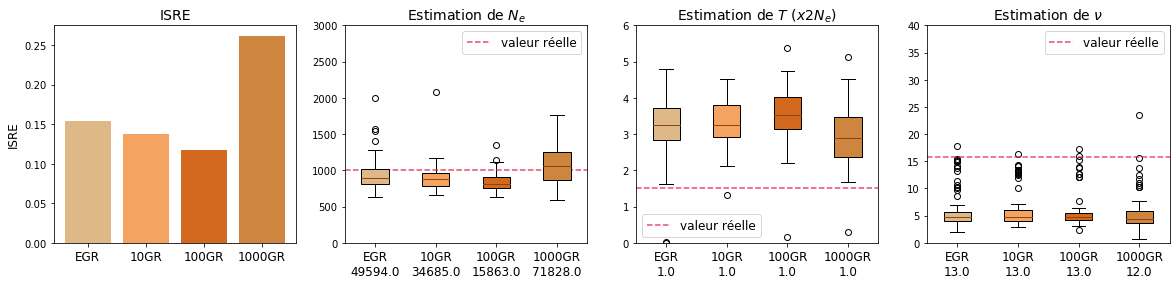

In [9]:
fig, ax = plt.subplots(1,4, figsize=(20,4))
BoxName = ['EGR','10GR', '100GR','1000GR']
BoxName2 = ['EGR\n'+str(round(np.var(Ne_eEGR))),'10GR\n'+str(round(np.var(Ne_e10GR))), '100GR\n'+str(round(np.var(Ne_e100GR))),'1000GR\n'+str(round(np.var(Ne_e1000GR)))]
BoxName3 = ['EGR\n'+str(round(np.var(T_eEGR))),'10GR\n'+str(round(np.var(T_e10GR))), '100GR\n'+str(round(np.var(T_e100GR))),'1000GR\n'+str(round(np.var(T_e1000GR)))]
BoxName4 = ['EGR\n'+str(round(np.var(Nu_eEGR))),'10GR\n'+str(round(np.var(Nu_e10GR))), '100GR\n'+str(round(np.var(Nu_e100GR))),'1000GR\n'+str(round(np.var(Nu_e1000GR)))]

# Histogramme des IRSE
r = np.arange(4)
ax[0].bar(r, [e_EGR, e_10GR, e_100GR, e_1000GR], color = ['burlywood','sandybrown','chocolate', 'peru'])
ax[0].set_xticks(r)
ax[0].set_xticklabels(BoxName, fontsize=12)
ax[0].set_title('ISRE', fontsize=14)
ax[0].set_ylabel('ISRE', fontsize=12)

#Estimation de Ne
bplot = ax[1].boxplot(Ne_expo, patch_artist = True)
ax[1].set_xticklabels(BoxName2,fontsize=12)
ax[1].axhline(1000, alpha = 0.75, c = 'crimson', ls = '--', label='valeur réelle')
ax[1].legend(fontsize=12)
ax[1].set_title("Estimation de $N_e$", fontsize=14)
ax[1].set_ylim(0, 3000)

colors = ['burlywood','sandybrown','chocolate', 'peru']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_edgecolor(color)
for median in bplot['medians']:
    median.set_color('saddlebrown')

#Estimation de T
bplot2 = ax[2].boxplot(T_expo, patch_artist = True)
ax[2].set_xticklabels(BoxName3, fontsize=12)
ax[2].axhline(1.5, alpha = 0.75, c = 'crimson', ls = '--', label='valeur réelle')
ax[2].legend(fontsize=12)
ax[2].set_title("Estimation de $T$ ($x2N_e$)", fontsize=14)
ax[2].set_ylim(0, 6)

colors = ['burlywood','sandybrown','chocolate', 'peru']
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_edgecolor(color)
for median in bplot2['medians']:
    median.set_color('saddlebrown')

#Estimation de nu
bplot3 = ax[3].boxplot(Nu_expo, patch_artist = True)
ax[3].set_xticklabels(BoxName4, fontsize=12)
ax[3].axhline(15.7, alpha = 0.75, c = 'crimson', ls = '--', label='valeur réelle')
ax[3].legend(fontsize=12)
ax[3].set_title(r"Estimation de $\nu$", fontsize=14)
ax[3].set_ylim(0, 40)

colors = ['burlywood','sandybrown','chocolate', 'peru']
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_edgecolor(color)
for median in bplot3['medians']:
    median.set_color('saddlebrown')

#plt.text(-4.5,45, 'a)', fontsize=14)
#plt.text(0,45, 'b)', fontsize=14)
#plt.text(-4.5,21, 'c)', fontsize=14)
#plt.text(0,21, 'd)', fontsize=14)

fig.savefig("/home/goulet/Documents/Stage/Modele_exponentiel.png")

In [10]:
#Modèle 2epoques
teEGR = '/home/goulet/Stage/Simulations_recapitate/twoepoch_model_2/EGR/plot'
te10GR = '/home/goulet/Stage/Simulations_recapitate/twoepoch_model_2/10GR/plot'
te100GR = '/home/goulet/Stage/Simulations_recapitate/twoepoch_model_2/100GR/plot'
te1000GR = '/home/goulet/Stage/Simulations_recapitate/twoepoch_model_2/1000GR/plot'

Ne = 2000
nu = 0.1
T = 200
t = np.linspace(0, 20000)


e_EGR, nb_EGR = erreur_fonction_moyenne(teEGR, t, Ne, T, nu, f_att_tepoch, 20000)
e_10GR, nb_10GR = erreur_fonction_moyenne(te10GR, t, Ne, T, nu, f_att_tepoch, 20000)
e_100GR, nb_100GR = erreur_fonction_moyenne(te100GR, t, Ne, T, nu, f_att_tepoch, 20000)
e_1000GR, nb_1000GR = erreur_fonction_moyenne(te1000GR, t, Ne, T, nu, f_att_tepoch, 20000)

/tmp/ipykernel_6052/2210433270.py:63: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  d = quad(dif, t[0], t[-1])[0]/nb_gen


In [11]:
init_vals=[4, 4.5*10**-4, 2000]
T_teEGR, Ni_teEGR, Nf_teEGR = fit_all_replicats_sigmo(teEGR, init_vals)
T_te10GR, Ni_te10GR, Nf_te10GR = fit_all_replicats_sigmo(te10GR, init_vals)
T_te100GR, Ni_te100GR, Nf_te100GR = fit_all_replicats_sigmo(te100GR, init_vals)
T_te1000GR, Ni_te1000GR, Nf_te1000GR = fit_all_replicats_sigmo(te1000GR, init_vals)

Nu_teEGR = [Nf_teEGR[i]/Ni_teEGR[i] for i in range(len(Nf_teEGR))]
Nu_te10GR = [Nf_te10GR[i]/Ni_te10GR[i] for i in range(len(Nf_te10GR))]
Nu_te100GR = [Nf_te100GR[i]/Ni_te1000GR[i] for i in range(len(Nf_te100GR))]
Nu_te1000GR = [Nf_te1000GR[i]/Ni_te1000GR[i] for i in range(len(Nf_te1000GR))]

T_te = [T_teEGR, T_te10GR, T_te100GR, T_te1000GR]
Ni_te = [Ni_teEGR, Ni_te10GR, Ni_te100GR, Ni_te1000GR]
Nu_te = [Nu_teEGR, Nu_te10GR, Nu_te100GR, Nu_te1000GR]

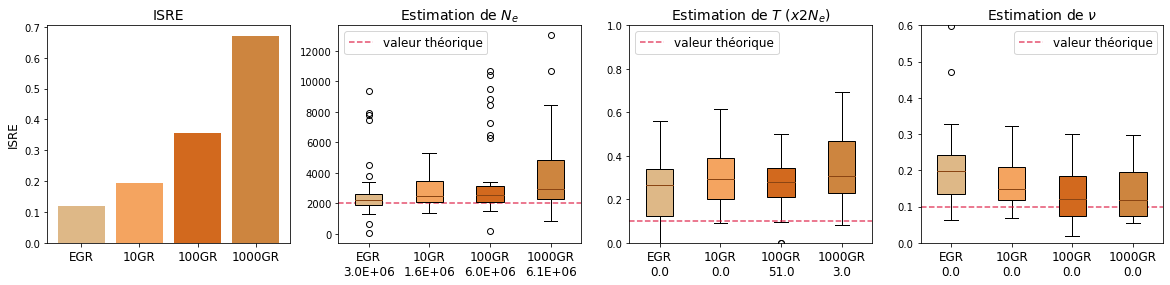

In [13]:
fig, ax = plt.subplots(1,4, figsize=(20,4))
BoxName = ['EGR','10GR', '100GR','1000GR']
BoxName2 = ['EGR\n'+format(np.var(Ni_teEGR), '.1E'),'10GR\n'+format(np.var(Ni_te10GR), '.1E'), '100GR\n'+format(np.var(Ni_te100GR),'.1E'),'1000GR\n'+format(np.var(Ni_te1000GR), '.1E')]
BoxName3 = ['EGR\n'+str(round(np.var(T_teEGR))),'10GR\n'+str(round(np.var(T_te10GR))), '100GR\n'+str(round(np.var(T_te100GR))),'1000GR\n'+str(round(np.var(T_te1000GR)))]
BoxName4 = ['EGR\n'+str(round(np.var(Nu_teEGR))),'10GR\n'+str(round(np.var(Nu_te10GR))), '100GR\n'+str(round(np.var(Nu_te100GR))),'1000GR\n'+str(round(np.var(Nu_te1000GR)))]


# Histogramme des IRSE
r = np.arange(4)
ax[0].bar(r, [e_EGR, e_10GR, e_100GR, e_1000GR], color = ['burlywood','sandybrown','chocolate', 'peru'])
ax[0].set_xticks(r)
ax[0].set_xticklabels(BoxName, fontsize=12)
ax[0].set_title('ISRE', fontsize=14)
ax[0].set_ylabel('ISRE', fontsize=12)

#Estimation de Ne
bplot = ax[1].boxplot(Ni_te, patch_artist = True)
ax[1].set_xticklabels(BoxName2, fontsize=12)
ax[1].axhline(2000, alpha = 0.75, c = 'crimson', ls = '--', label='valeur théorique')
ax[1].legend(fontsize=12)
ax[1].set_title("Estimation de $N_e$", fontsize=14)

colors = ['burlywood','sandybrown','chocolate', 'peru']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_edgecolor(color)
for median in bplot['medians']:
    median.set_color('saddlebrown')

#Estimation de T
bplot2 = ax[2].boxplot(T_te, patch_artist = True)
ax[2].set_xticklabels(BoxName3, fontsize=12)
ax[2].axhline(0.1, alpha = 0.75, c = 'crimson', ls = '--', label='valeur théorique')
ax[2].legend(fontsize=12)
ax[2].set_title("Estimation de $T$ ($x2N_e$)", fontsize=14)
ax[2].set_ylim(0, 1)

colors = ['burlywood','sandybrown','chocolate', 'peru']
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_edgecolor(color)
for median in bplot2['medians']:
    median.set_color('saddlebrown')

#Estimation de nu
bplot3 = ax[3].boxplot(Nu_te, patch_artist = True)
ax[3].set_xticklabels(BoxName4, fontsize=12)
ax[3].axhline(0.1, alpha = 0.75, c = 'crimson', ls = '--', label='valeur théorique')
ax[3].legend(fontsize=12)
ax[3].set_title(r"Estimation de $\nu$", fontsize=14)
ax[3].set_ylim(0, 0.6)

colors = ['burlywood','sandybrown','chocolate', 'peru']
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_edgecolor(color)
for median in bplot3['medians']:
    median.set_color('saddlebrown')

#plt.text(-4.5,1.35, 'a)', fontsize=14)
#plt.text(0,1.35, 'b)', fontsize=14)
#plt.text(-4.5,0.63, 'c)', fontsize=14)
#plt.text(0,0.63, 'd)', fontsize=14)


fig.savefig("/home/goulet/Documents/Stage/Modele_twoepoch.png")